** *italicized text*1. import necessry libraries**
---
**First of all,we need a number of libraries to import during the project ,which
we enter in this cell,there are two important variables at the end of this
cell,the first address is the base path and the second address is the new
dataset path we created.**




In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from PIL import Image
import shutil  

base_path = '/content/gdrive/My Drive'
new_data_set_path = '/content/gdrive/My Drive/final-data-set'

Using TensorFlow backend.


**2. connect to google drive to access dataset.**
---
**In this cell,there is two lines of code that can be connected to google drive
with these two lines,for example,information can be read from google drive
and so on.**


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**3. test connection**
---
**In this cell ,a line of code is written , in which it is specified whether it
is properly connected to google drive or not.**


In [0]:
# list all folders and files in My Drive
! ls '/content/gdrive/My Drive'

 10    20    5	 'Colab Notebooks'  'Getting started.pdf'   validation.txt
 100   200   50   final-data-set     train.txt


**4. define model parameters such as number of epochs,... and create data generator for partialy read big dataset**
---
**In this cell,a number of parameters are defined for the neural network,such
as the number of batch ,number of epoch train samples ,number of test
samples.After this step ,we use the image data generator technique ,which
allows us to capture a large volume of images use inside the neural network.**


In [0]:
#define categories:
categories = {0 : '5', 1: '10', 2: '20', 3: '50', 4: '100', 5: '200'}

# define model parameters.
mini_batch = 50 # every 50 samples gradient update weights.
epochs = 12 # how many times model continues to learn.
number_of_train = 5550
number_of_test = 450

# preprocess train data.
# normalize rgb pixel values between 0, 1.
train_datagen = ImageDataGenerator(
    rescale=1./255
)
# preprocess test data.
# normalize rgb pixel values between 0, 1.
test_datagen = ImageDataGenerator(
    rescale=1./255
)
# create train data generator to read train dataset partialy.
train_generator = train_datagen.flow_from_directory(
    new_data_set_path+'/train',
    
    target_size=(180, 320),
    batch_size=mini_batch,
)
# create train data generator to read test dataset partialy.
test_generator = test_datagen.flow_from_directory(
        new_data_set_path+'/test',
        target_size=(180, 320),
        batch_size=mini_batch)

Found 5550 images belonging to 6 classes.
Found 450 images belonging to 6 classes.


**5. define structure of neural net model**
---
**In the fifth cell, we de 
ne the neural network .In fact the neural network is
made up a series of layers such as Convolution layer,Leaky-Relu,Maxpooling,Dropout
and so on.**


In [0]:
model=Sequential()
model.add(Conv2D(input_shape=(180, 320 ,3),padding='same',kernel_size=3,filters=16))
model.add(LeakyReLU(0.1))
model.add(Conv2D(padding='same',kernel_size=3,filters=32))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(padding='same',kernel_size=3,filters=32))
model.add(LeakyReLU(0.1))
model.add(Conv2D(padding='same',kernel_size=3,filters=64))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(LeakyReLU(0.1))
model.add(Dense(len(categories)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 320, 16)      448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 180, 320, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 320, 32)      4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 180, 320, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 160, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 160, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 160, 32)      

**6. compile model and set optimizer method and loss function for it**
---
**This cell compiles our model ,and then we have to determine the type of
optimizer ,such as gradient descent,rmsprop,....,but the most famous opti-
mizer is called Adam ,which is both fast and optimal.**



In [0]:
model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])

**7.start training and keep track loss and accuracy for plot curves after training**
---
**In this cell is defined an object ,called hisObject.this object keeps a history of accuracy and error at every step that we can use in the charts to show the accuracy and error process.In addition,another object is de 
ned , called epoch,this object train our model twelve rounds,the number of rounds can be changed.**


In [0]:
histObject = model.fit(train_generator,
          steps_per_epoch=(number_of_train // 100),
          epochs=12,
          verbose=1,
          validation_data=test_generator)

Epoch 1/12
55/55 [==============================] - 1317s 24s/step - loss: 3.9634 - accuracy: 0.1858 - val_loss: 4.9334 - val_accuracy: 0.1667
Epoch 2/12
55/55 [==============================] - 1306s 24s/step - loss: 1.5504 - accuracy: 0.3771 - val_loss: 3.6626 - val_accuracy: 0.2489
Epoch 3/12
55/55 [==============================] - 38s 689ms/step - loss: 0.9294 - accuracy: 0.6480 - val_loss: 0.7761 - val_accuracy: 0.7444
Epoch 4/12
55/55 [==============================] - 16s 283ms/step - loss: 0.5466 - accuracy: 0.8015 - val_loss: 0.9233 - val_accuracy: 0.7200
Epoch 5/12
55/55 [==============================] - 16s 292ms/step - loss: 0.3246 - accuracy: 0.8840 - val_loss: 0.1783 - val_accuracy: 0.8800
Epoch 6/12
55/55 [==============================] - 15s 280ms/step - loss: 0.2178 - accuracy: 0.9276 - val_loss: 0.2039 - val_accuracy: 0.9311
Epoch 7/12
55/55 [==============================] - 15s 280ms/step - loss: 0.1948 - accuracy: 0.9309 - val_loss: 0.2277 - val_accuracy: 0.9333

**8. save model for future use**
---
**This cell is to store our model,which is to store the structure and weights
in a file.In fact in neural network,we train to save our model so that if new
images come later ,it can predict what images will be in which classes.**


In [0]:
model.save('model.h5')

**9. plot loss and accuracy curve**
---
**In this cell,the trend of loss and accuracy shows us that the orange lines are
for the test and blue lines are for training.**


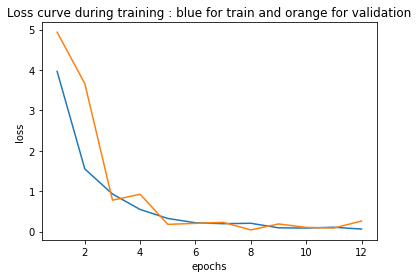

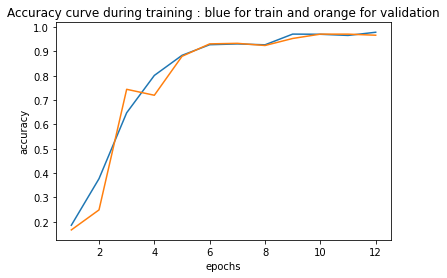

In [0]:
# plot loss functions curve function as epochs
plt.figure(1)
plt.plot(np.arange(1, 13), histObject.history['loss'])
plt.plot(np.arange(1, 13), histObject.history['val_loss'])
plt.title('Loss curve during training : blue for train and orange for validation')
plt.xlabel('epochs')
plt.ylabel('loss')
# plot accuracy curve function as epochs

plt.figure(2)
plt.plot(np.arange(1, 13), histObject.history['accuracy'])
plt.plot(np.arange(1, 13), histObject.history['val_accuracy'])
plt.title('Accuracy curve during training : blue for train and orange for validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()